<a href="https://colab.research.google.com/github/Saida-20/Cholera_Outbreak/blob/main/Cholera_Outbreak_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Our model will be trained to predict this.**

**Importing required libaries**


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import svm
# from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings as wr
wr.filterwarnings('ignore')

**Uploading Dataset from google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Loading the data from CSV file to a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preprocessing**


 Data preprocessing in this project will consist of the following: a.Data analyzing: this is a set of procedure that enables Gaining general knowledge about the data—including its values, kinds, number of rows and columns, and missing values. these are the  primary objective of data understanding.
 b. Data Cleaning: Our dataset will be searched for duplicate samples, and null values.
 c. Exploratory Data analysis(EDA): EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like:

main features of data variables and relationships that hold between them Identifying which variables are important for our problem  

**Analyzing the Data**

It involve Gaining general knowledge about the data—including its values, kinds, number of rows and columns, and missing values—is the primary objective of data understanding.

In [ ]:
# printing the first 5 rows of the dataframe
df.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.7,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.0,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.1,Eastern Mediterranean


In [ ]:
#the dataset contain 6 attributes(column ) and 2493 records (rows)

df.shape

(2492, 6)

**shape**: shape will show how many features (columns) and observations (rows) there are in the dataset.

**identifying Data Types**

In [ ]:
df.dtypes

,0
Country,object
Year,int64
Number of reported cases of cholera,object
Number of reported deaths from cholera,object
Cholera case fatality rate,object
WHO Region,object


the Dataset contains different data types which include ,object(string) and float64(integer)

**identifying the Data gaps**

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Number of reported cases of cholera,22
Number of reported deaths from cholera,117
Cholera case fatality rate,127
WHO Region,0


The code **df.isnull().sum()** checks for missing values in each column of the DataFrame ‘df’ and returns the sum of null values for each column. This is showing the summation of the null values in each column present in the dataset

**Describing  the Dataset**

In [ ]:
df.describe()

,Year
count,2492.000000
mean,1992.343098
std,14.834151
min,1949.000000
25%,1981.000000
50%,1994.000000
75%,2004.000000
max,2016.000000


The DataFrame “df” is statistically summarized by the code **df.describe()**, which gives the count, mean, standard deviation, minimum, and quartiles for each numerical column. The dataset’s central tendencies and spread are briefly summarized.

**column to list**

In [ ]:
df.columns.tolist()

['Country',
 'Year',
 'Number of reported cases of cholera',
 'Number of reported deaths from cholera',
 'Cholera case fatality rate',
 'WHO Region']

The **code df.columns.tolist()** converts the column names of the DataFrame ‘df’ into a Python list, providing a convenient way to access and manipulate column names.

**checking for duplicate values**

In [ ]:
df.nunique()

,0
Country,162
Year,68
Number of reported cases of cholera,1306
Number of reported deaths from cholera,438
Cholera case fatality rate,846
WHO Region,6


The function **df.nunique()** determines how many unique values there are in each column of the DataFrame “df,” offering information about the variety of data that makes up each feature.

**Data Cleaning**

In [ ]:
df.replace(np.nan,0,inplace=True)

Here the **df.replace()** function is used to replace the  null values in the dataset  to 0 .

**Data Clean Check**

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Number of reported cases of cholera,0
Number of reported deaths from cholera,0
Cholera case fatality rate,0
WHO Region,0


 the dataset is rechecked to see if there's any null values that has not being handled. **df.isnull().sum()** shows there's no any null values in the dataset .

**Correcting the "Unkown" Values if there is any in the dataset**

In [ ]:
df.replace('Unkown',0,inplace=True)

In [ ]:
df['Number of reported cases of cholera'] = df['Number of reported cases of cholera'].str.replace('3 5', '35')

In [ ]:
df['Number of reported deaths from cholera'] = df['Number of reported deaths from cholera'].str.replace('Unknown', '0')

In [ ]:
df['Number of reported deaths from cholera'] = df['Number of reported deaths from cholera'].str.replace('0 0', '0')

**identifying the total number of countries present in the Dataset**

In [ ]:
country_list= df.Country.unique()
len(df.Country.unique())

162

**Feature Selection**

Here we identify the relevant features that contributes to the cholera outbreak analysis,which can be achieved by performing the following steps

**Reducing the dimensionality of the dataset**

In [ ]:
df.drop('Country', axis=1, inplace=True)

The function **df.drop()** takes three parameters and in our case it wil remove the country attribute in our dataset and upadte the dataset

In [ ]:
df.head()

,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,2016,677,5,0.7,Eastern Mediterranean
1,2015,58064,8,0.01,Eastern Mediterranean
2,2014,45481,4,0.0,Eastern Mediterranean
3,2013,3957,14,0.35,Eastern Mediterranean
4,2012,12,0,0.1,Eastern Mediterranean


### **Exploratory Data Analysis(EDA)**
In thia project, our EDA  entails visually and statistically analyzing datasets to find patterns, trends, and insights.
The principal goals of our  exploratory data analysis (EDA) are to detect anomalies in the dataset and develop recommendations for additional investigation, thereby guaranteeing a thorough comprehension of the subtleties of the data.

**WHO region wise visualization of Total Number of Reported cases and Number of Deaths over the years**

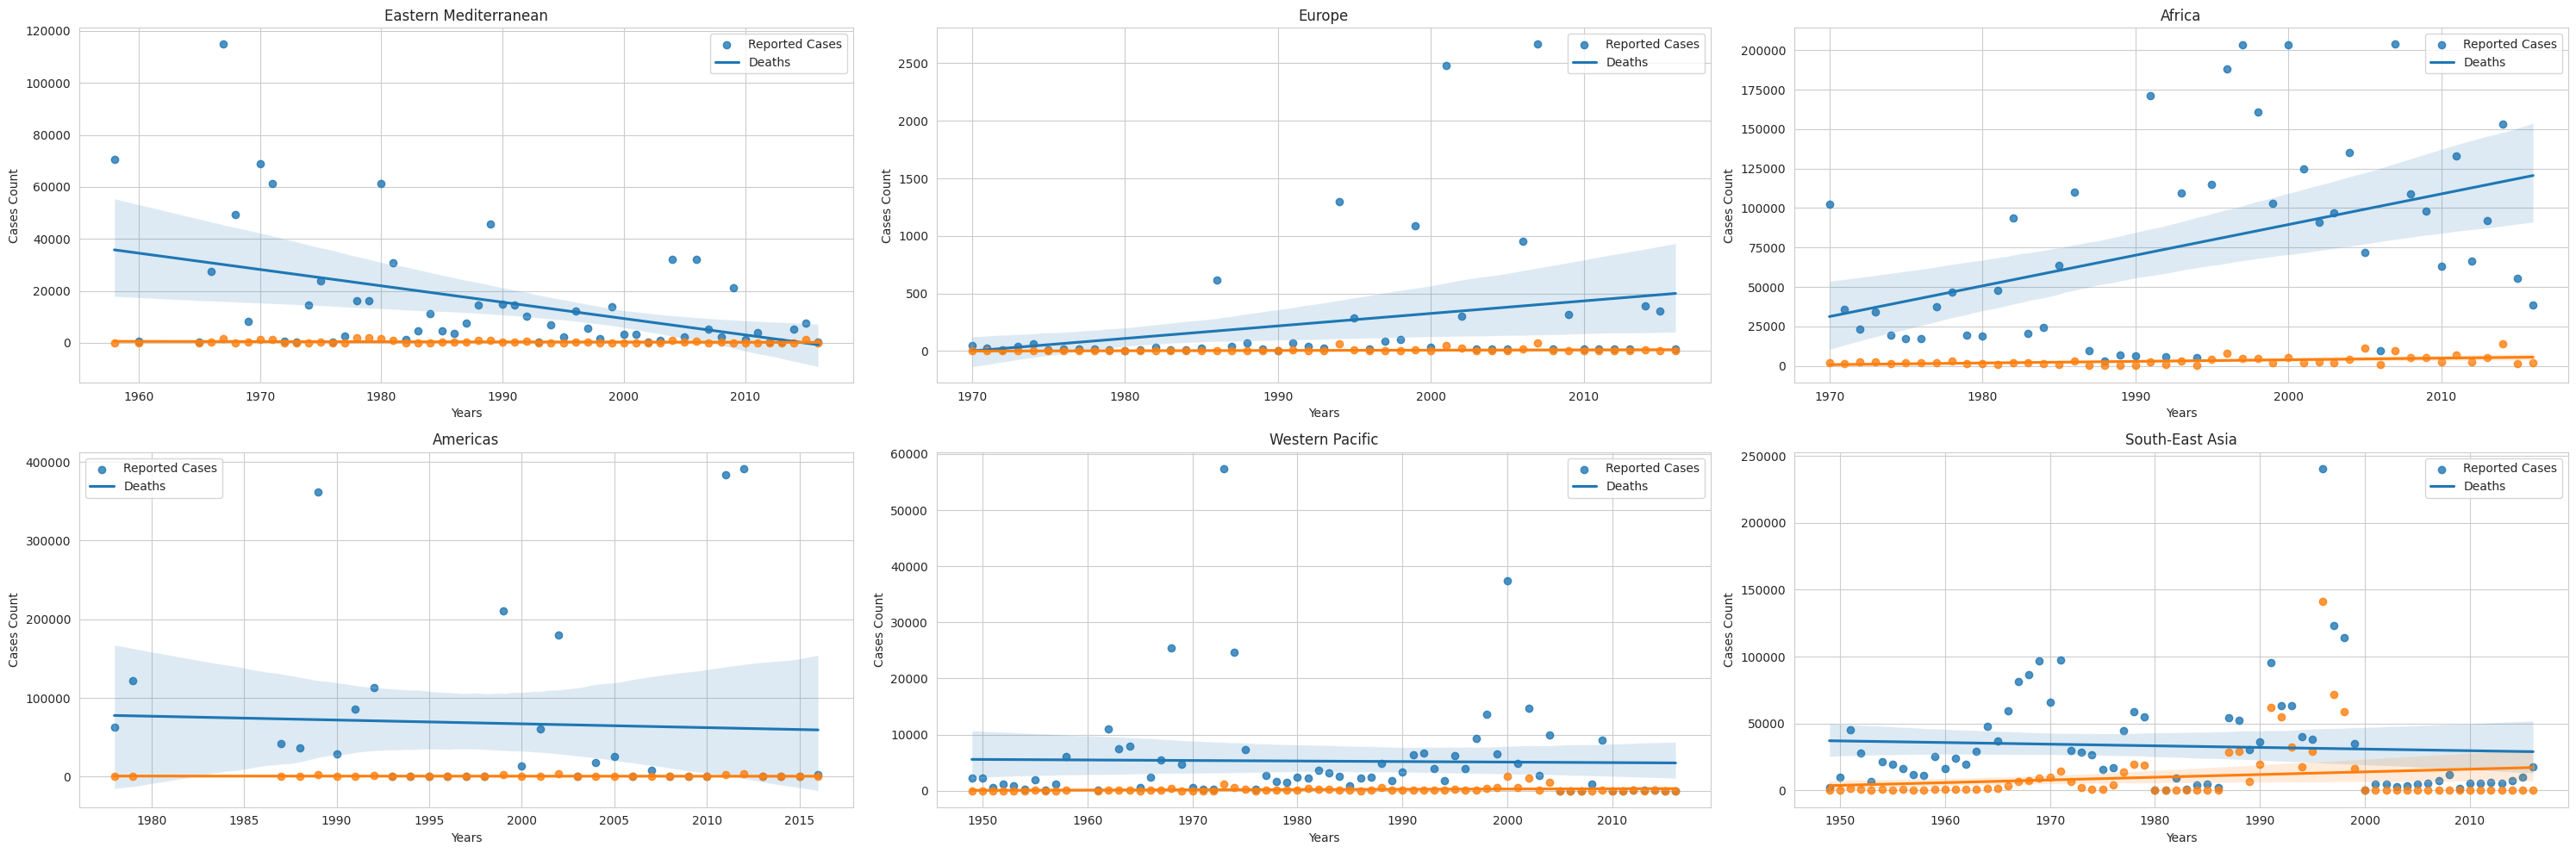

In [ ]:
# Install the necessary modules.
!pip install seaborn
!pip install matplotlib


# Import the necessary modules.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the plot style.
sns.set_style('whitegrid')

# Create the figure and subplots.
fig = plt.figure(figsize=(30,10))
for c,num in zip(df['WHO Region'].unique(), np.arange(1,1+len(df['WHO Region'].unique()))):
    file_req=df[df['WHO Region']==c]
    ax = fig.add_subplot(2,3,num)

    # Extract the year and count data.
    x=file_req['Year'].unique()
    y11=file_req.groupby('Year').apply(lambda x:np.sum(pd.to_numeric(x['Number of reported cases of cholera']))).reset_index(name='Counts')
    y1=y11['Counts']
    y21=file_req.groupby('Year').apply(lambda x:np.sum(pd.to_numeric(x['Number of reported deaths from cholera']))).reset_index(name='Counts')
    y2=y21['Counts']

    # Plot the data.
    sns.regplot(x=x, y=y1, ax=ax)
    sns.regplot(x=x, y=y2, ax=ax)

    # Add the legend, title, and labels.
    ax.legend(['Reported Cases','Deaths'])
    ax.set_title(c)
    ax.set_xlabel('Years')
    ax.set_ylabel('Cases Count')

# Adjust the layout and show the plot.
plt.tight_layout()
plt.show()

Observation: South East Asia is having the highest number of Cholera detected cases and Death,when all time data is considered. But if we check into the last 10 years data,America and Africa has been the regions which have the highest numberof Cases, although the death rates have been well controlled, as compared to South East Asia in 1980s-200s.

**importing a shape file ,that will be required for the ploting of Global Heatmap**

In [ ]:
!pip install fiona
!pip install geopandas
!pip install shapely
!pip install rtree

import geopandas as gpd
import rtree
import shapely
import fiona
# import fiona.ogrext # This import is not strictly needed for fiona.Env

# fiona.ogrext.Config.set('SHAPE_RESTORE_SHX', 'YES') # This line caused the error
from google.colab import drive
drive.mount('/content/drive')

# Extract the zip file
import zipfile
zip_path = '/content/drive/MyDrive/archive.zip'
extract_dir = '/content/'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Load the shapefile directly, setting the SHAPE_RESTORE_SHX option using fiona.Env and specifying fiona engine
with fiona.Env(SHAPE_RESTORE_SHX='YES'):
    map_df = gpd.read_file('/content/TM_WORLD_BORDERS-0.3.shp', engine='fiona')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**The Countries in the .shp file needs to be the same as the Country name i the data file. identifying those countries and replacing their names.**

In [ ]:
# Calculate total cholera cases per country BEFORE dropping the 'Country' column
df_crty = df.groupby(['Country']).apply(lambda x:np.sum(pd.to_numeric(x['Number of reported cases of cholera']))).reset_index(name='Count of Cholera Cases')
print('The Number of Cholera Cases for the counties:\n',df_crty)

The Number of Cholera Cases for the counties:
                                 Country  Count of Cholera Cases
0                           Afghanistan                263843.0
1                               Albania                   626.0
2                               Algeria                 12729.0
3                               Andorra                     0.0
4                                Angola                191036.0
..                                  ...                     ...
157  Venezuela (Bolivarian Republic of)                  6969.0
158                            Viet Nam                 73128.0
159                               Yemen                 52462.0
160                              Zambia                 97606.0
161                            Zimbabwe                153428.0

[162 rows x 2 columns]


In [ ]:
map_df.columns.tolist()

['fips',
 'iso2',
 'iso3',
 'un',
 'name',
 'area',
 'pop2005',
 'region',
 'subregion',
 'lon',
 'lat',
 'geometry']

In [ ]:
map_df = map_df.rename(columns={'ADMIN': 'name'})

# Correcting column access from .name to ['name']
map_df['name'].replace({'Burma':'Myanmar'},regex=True,inplace=True)
map_df['name'].replace({'Korea, Republic of':'Republic of Korea'},regex=True,inplace=True)
map_df['name'].replace({'Russia':'Russian Federation'}, regex=True,inplace=True)
map_df['name'].replace({'United Kingdom':'United Kingdom of Great Britain and Northern Ireland'}, regex=True,inplace=True)
map_df['name'].replace({'United States':'United States of America'}, regex=True,inplace=True)
map_df['name'].replace({'Venezuela':'Venezuela(Bolivarian Republic of)'}, regex=True,inplace=True)

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/TM_WORLD_BORDERS-0.3.shp.zip'

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_contents = zip_ref.namelist()
        print(f"Contents of {zip_path}:")
        for item in zip_contents:
            print(item)

        if 'TM_WORLD_BORDERS-0.3.dbf' in zip_contents:
            print("\nTM_WORLD_BORDERS-0.3.dbf is PRESENT in the zip archive.")
        else:
            print("\nTM_WORLD_BORDERS-0.3.dbf is NOT PRESENT in the zip archive.")
else:
    print(f"Error: Zip file not found at {zip_path}")

Contents of /content/drive/MyDrive/TM_WORLD_BORDERS-0.3.shp.zip:
TM_WORLD_BORDERS-0.3.shp

TM_WORLD_BORDERS-0.3.dbf is NOT PRESENT in the zip archive.


In [ ]:
import os
dbf_file_path = '/content/TM_WORLD_BORDERS-0.3.dbf'
if os.path.exists(dbf_file_path):
    print(f"The file {dbf_file_path} is present.")
else:
    print(f"The file {dbf_file_path} is NOT present.")

The file /content/TM_WORLD_BORDERS-0.3.dbf is NOT present.


**Creating a World Heat Map to display the total number of cases**

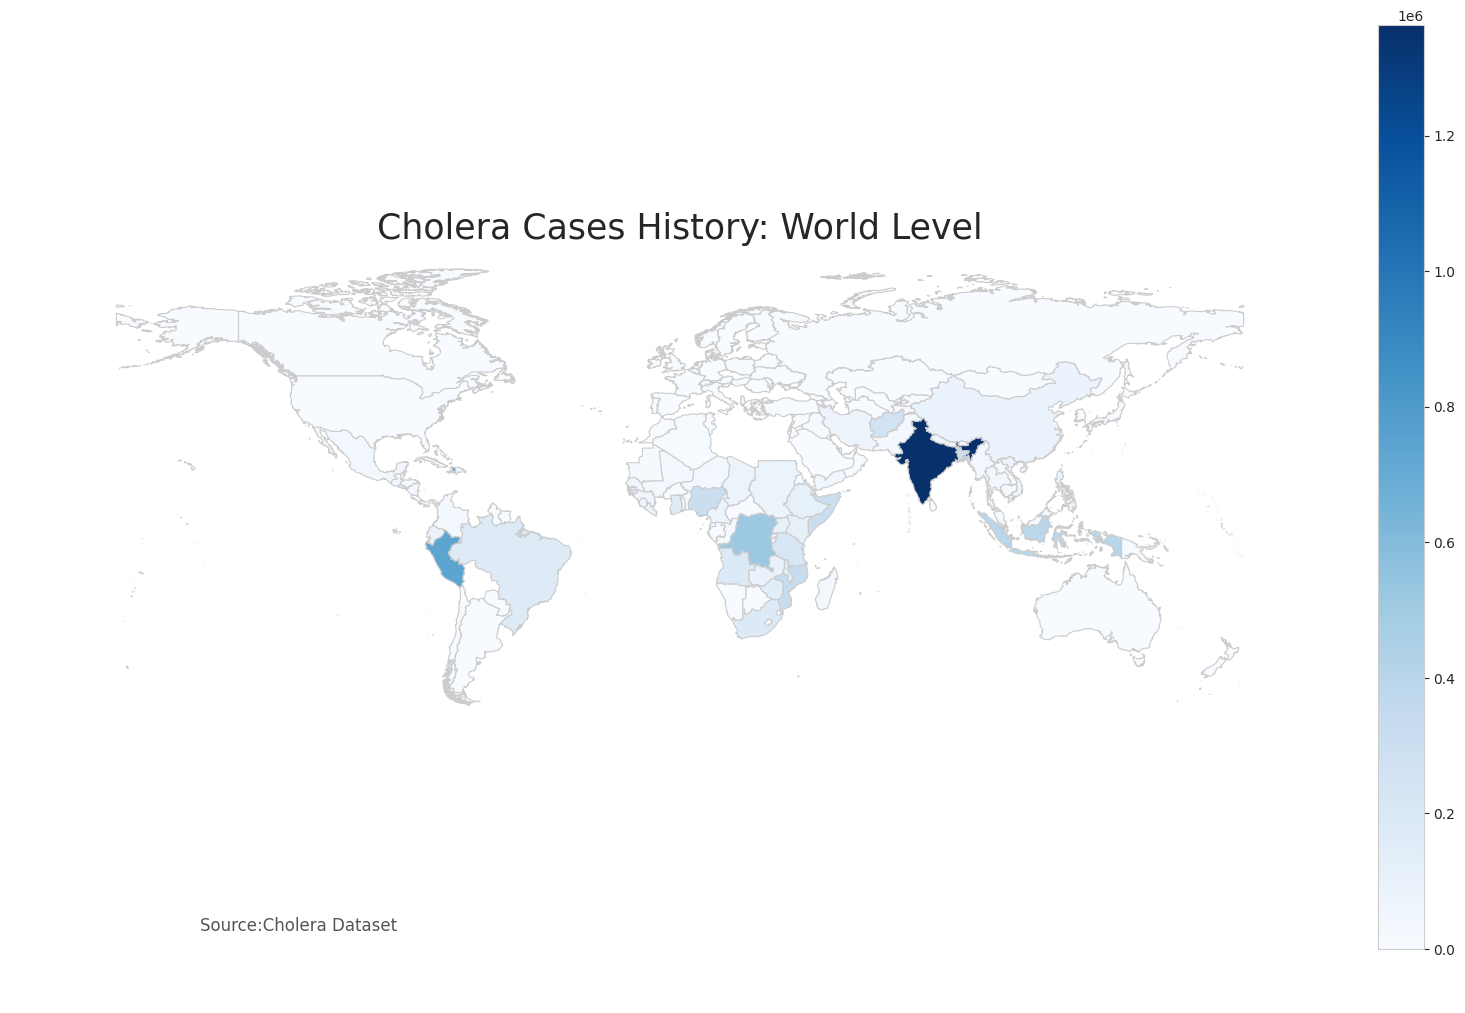

In [ ]:
merged = map_df.set_index('name').join(df_crty.set_index('Country'))
variable = 'Count of Cholera Cases'
vmin, vmax= np.min(merged['Count of Cholera Cases']), np.max(merged['Count of Cholera Cases'])
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Cholera Cases History: World Level', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:Cholera Dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

Observation: What we can see is, India has the highest number of total cases, followed by Haiti (Shown as a small dot in the Carribean islands) and followed by Peru- and have been marked with the darkest shades of Blue. Countries where there has been no information has been shown in White

**To identify the span of last 10 years from the dataset**

In [ ]:
df_yrs=df.Year.unique()
df_yrs.sort()
final_10_yrs=df_yrs[-10:]
final_10_yrs

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

Observation The Data available has a data uptil 2016. Hence considering the last 10 years would range from 2007-2016.

**Countries with the Least number of Cases in the past 10 years**

In [ ]:
ten_yr_case=df[df['Year'].isin(final_10_yrs)]
df_yr_ctry=ten_yr_case.groupby(['Country']).apply(lambda x:np.sum(pd.to_numeric(x['Number of reported cases of cholera']))).reset_index(name='Count of Cholera Cases')
best_cases_country=df_yr_ctry.sort_values(by='Count of Cholera Cases',ascending=True)[0:10]
print('Countries having the least number of Cholera Cases in the last 10 years: \n',best_cases_country)

Countries having the least number of Cholera Cases in the last 10 years: 
        Country  Count of Cholera Cases
76    Slovenia                     0.0
7       Brazil                     1.0
42      Israel                     1.0
29     Finland                     1.0
63        Oman                     1.0
45  Kazakhstan                     1.0
23     Denmark                     2.0
31       Gabon                     2.0
43       Italy                     2.0
62      Norway                     2.0


Observation: Europe, Brazil and parts of Asia have a comparatively good control in the number of Cholera cases.|

**Plotting the Countries with the Least Number of Cases in the Last 10 Years**

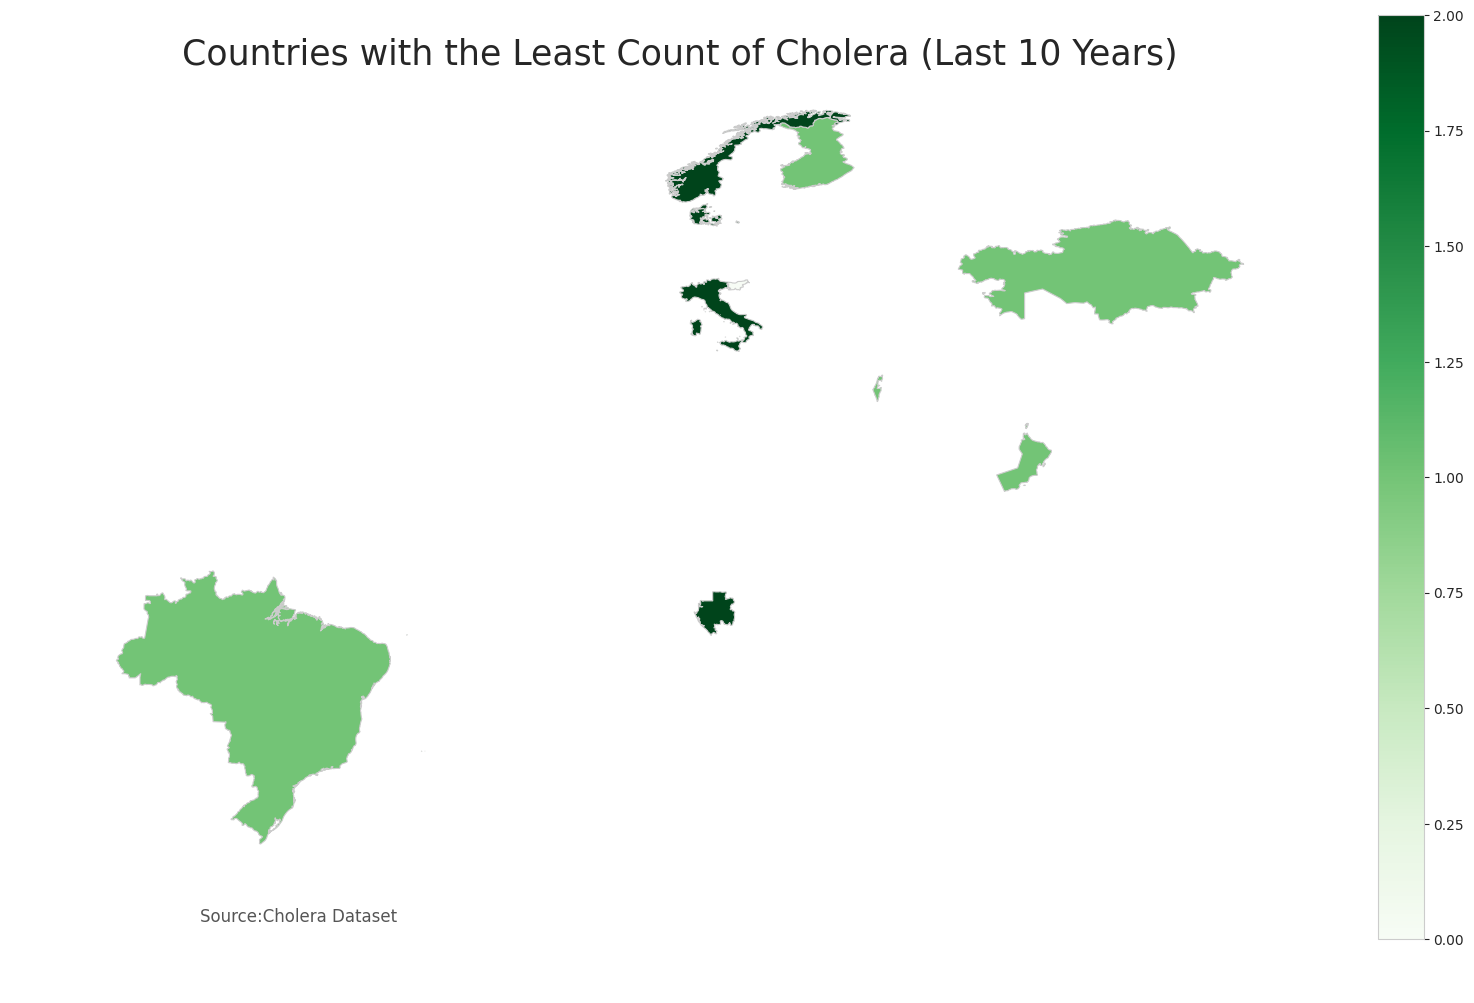

In [ ]:
merged = map_df.set_index('name').join(best_cases_country.set_index('Country'))
variable = 'Count of Cholera Cases'
vmin, vmax = np.min(merged['Count of Cholera Cases']), np.max(merged['Count of Cholera Cases'])
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Countries with the Least Count of Cholera (Last 10 Years)', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:Cholera Dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

**List of Countries with the Maximum number of cases in the past 10 Years**

In [ ]:
worst_cases_country=df_yr_ctry.sort_values(by='Count of Cholera Cases',ascending=False)[0:10]
print('Countries having the most number of Cholera Cases in the last 10 years: \n',worst_cases_country)

Countries having the most number of Cholera Cases in the last 10 years: 
                              Country  Count of Cholera Cases
37                             Haiti                795794.0
22  Democratic Republic of the Congo                246985.0
77                           Somalia                179693.0
61                           Nigeria                137846.0
95                          Zimbabwe                130537.0
0                        Afghanistan                119339.0
28                          Ethiopia                 61174.0
34                             Ghana                 53171.0
55                        Mozambique                 52715.0
93                             Yemen                 47895.0


Observation: Africa and America (Haiti has the highest counts) has the most dominating numbers in the countries list having maximum number of Cholera Cases detected. We have validated this information below with the help of a heatmap

**Plotting the Countries with the Maximum number of Cases in the last 10 Years**

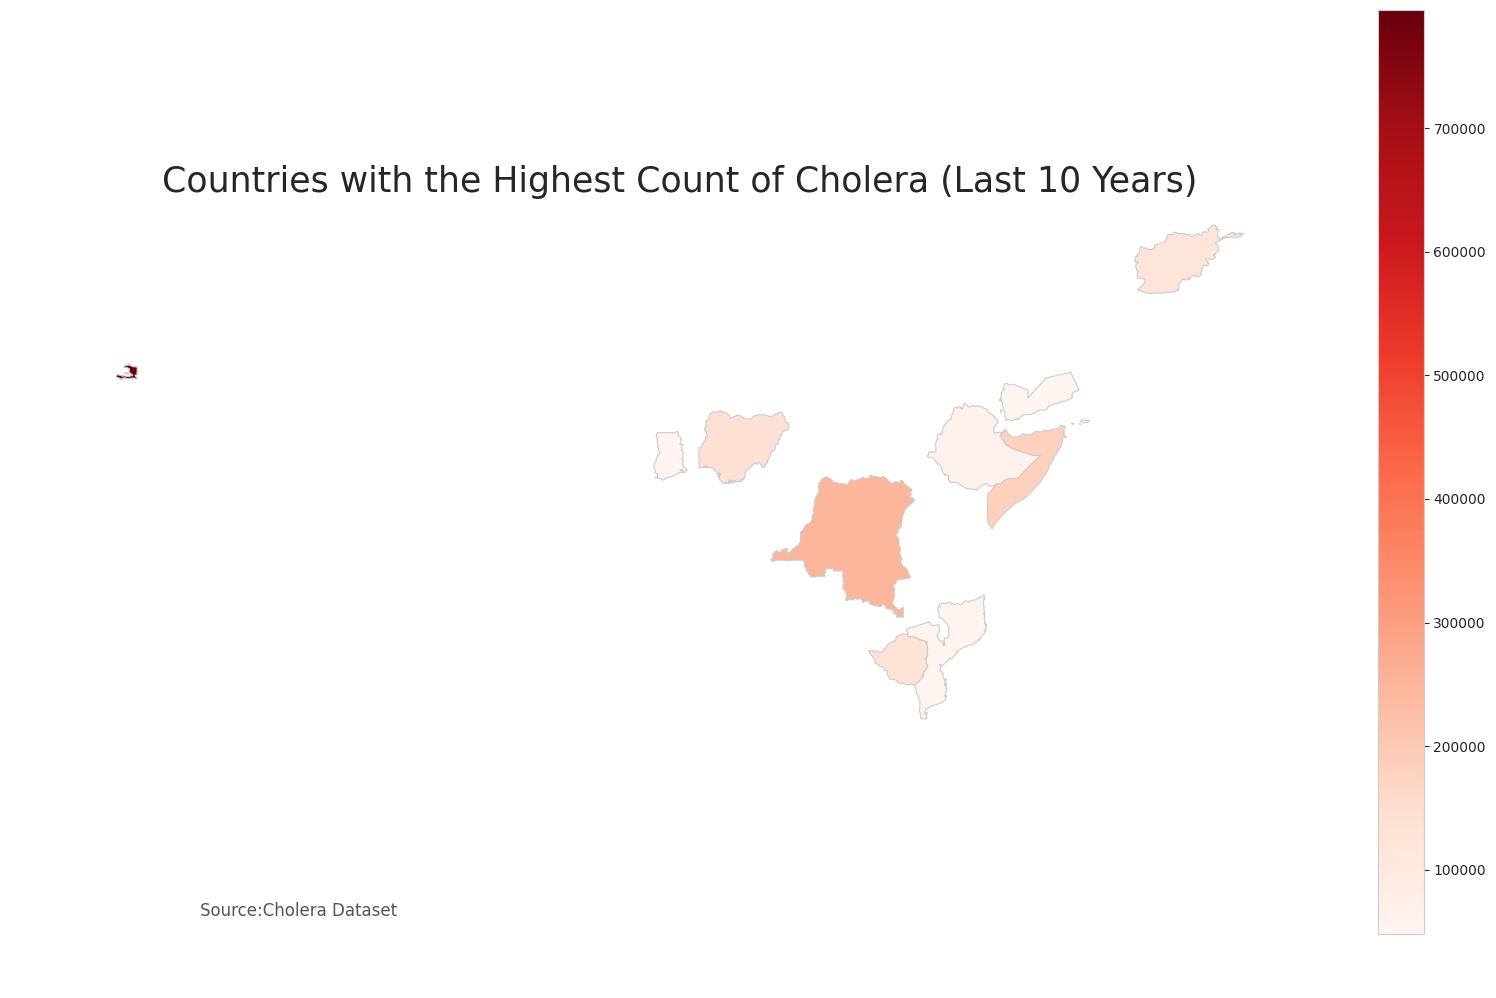

In [ ]:
merged = map_df.set_index('name').join(worst_cases_country.set_index('Country'))
variable = 'Count of Cholera Cases'
vmin, vmax = np.min(merged['Count of Cholera Cases']), np.max(merged['Count of Cholera Cases'])
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Countries with the Highest Count of Cholera (Last 10 Years)', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:Cholera Dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

**Countries Level Analysis- Deaths from Cholera (All Time)**

The Number of Cholera Cases for the counties:
                                 Country  Count of Deaths from Cholera
0                           Afghanistan                        2641.0
1                               Albania                          25.0
2                               Algeria                         650.0
3                               Andorra                           0.0
4                                Angola                        9920.0
..                                  ...                           ...
157  Venezuela (Bolivarian Republic of)                         163.0
158                            Viet Nam                        1592.0
159                               Yemen                         572.0
160                              Zambia                        4877.0
161                            Zimbabwe                        7137.0

[162 rows x 2 columns]


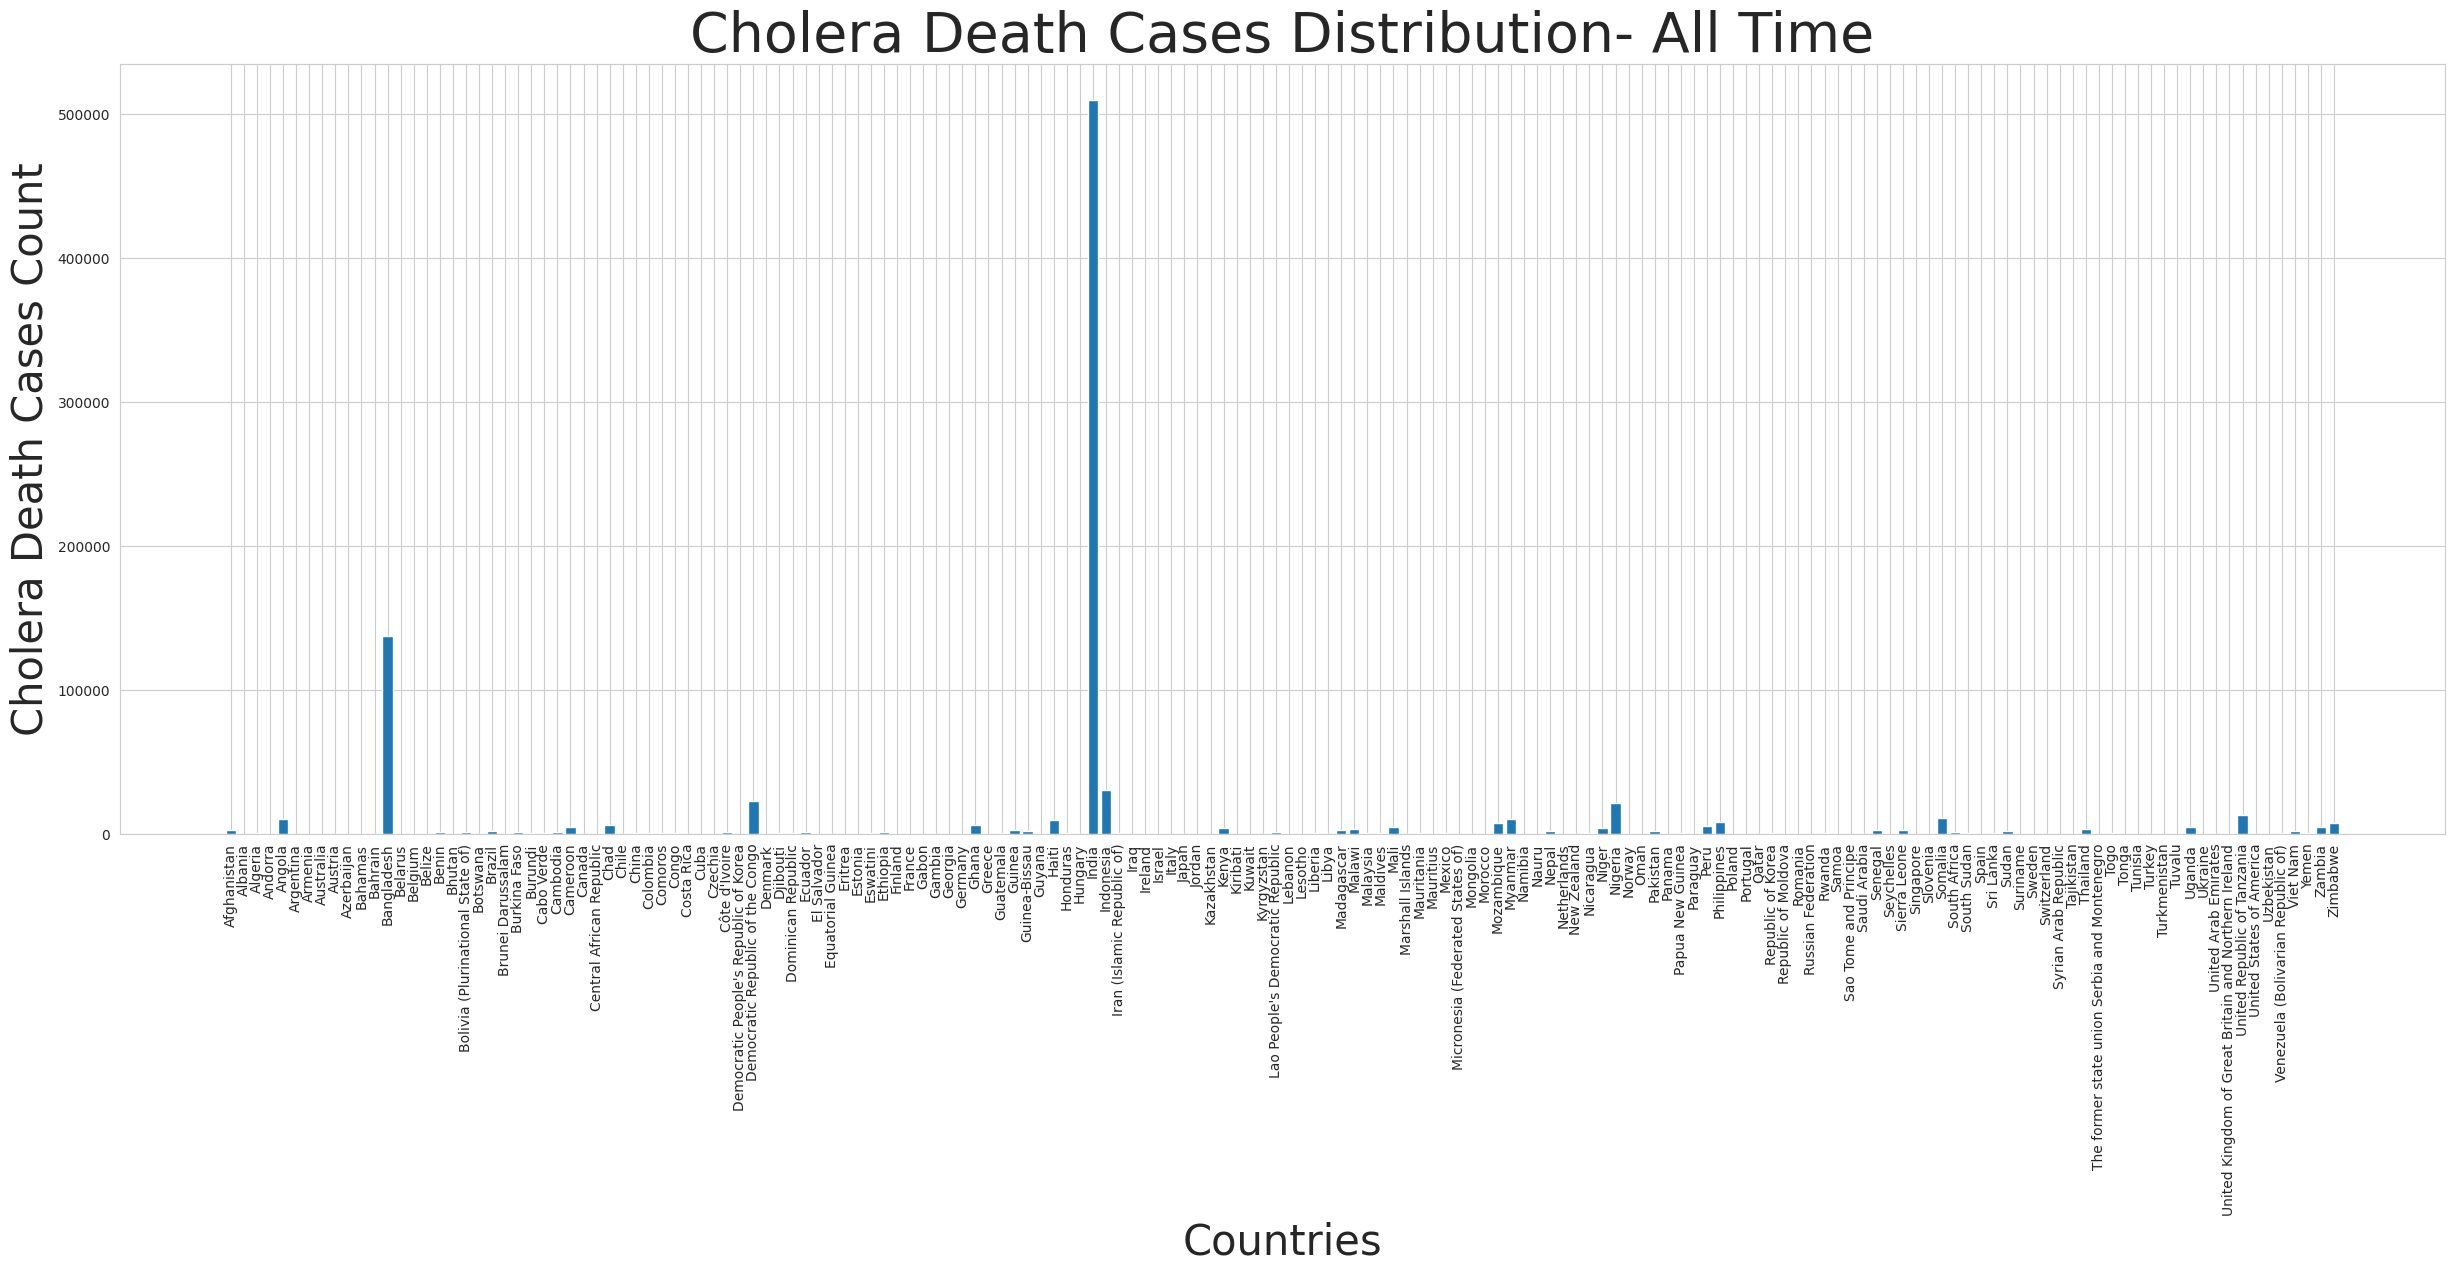

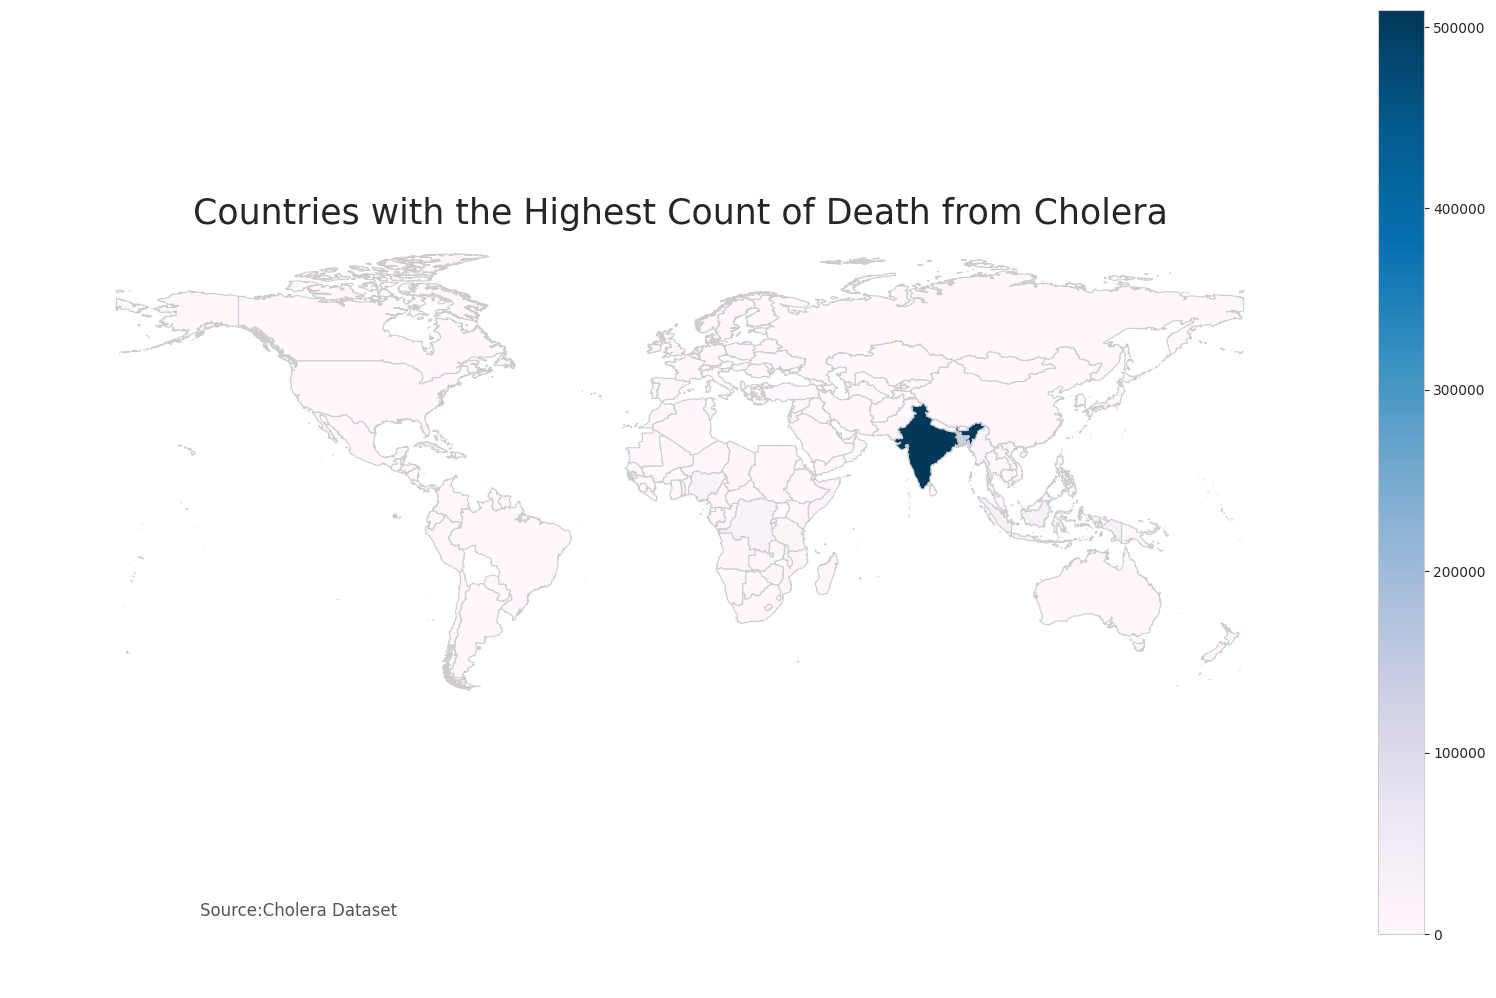

In [ ]:
df_crty_deaths=df.groupby(['Country']).apply(lambda x:(pd.to_numeric(x['Number of reported deaths from cholera'])).sum()).reset_index(name='Count of Deaths from Cholera')
print('The Number of Cholera Cases for the counties:\n',df_crty_deaths)
plt.figure(figsize=(30,10))
plt.bar(df_crty_deaths['Country'],df_crty_deaths['Count of Deaths from Cholera'])
plt.xlabel('Countries',size=30)
plt.ylabel('Cholera Death Cases Count',size=30)
plt.title('Cholera Death Cases Distribution- All Time',size=40)
plt.xticks(rotation=90)
plt.show()
merged = map_df.set_index('name').join(df_crty_deaths.set_index('Country'))
variable = 'Count of Deaths from Cholera'
vmin, vmax = np.min(merged['Count of Deaths from Cholera']), np.max(merged['Count of Deaths from Cholera'])
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='PuBu', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Countries with the Highest Count of Death from Cholera', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:Cholera Dataset',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='PuBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

In [ ]:
# Filter data for India
df_india = df[df['Country'] == 'India']

# Display the first few rows of India's data
display(df_india.head())

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
911,India,2016,841,3,0.4,South-East Asia
912,India,2015,889,4,0.4,South-East Asia
913,India,2014,4031,21,0.5,South-East Asia
914,India,2013,6008,54,0.9,South-East Asia
915,India,2010,5155,9,0.17,South-East Asia


#### **Cholera Cases and Deaths Pattern in India Over Years**

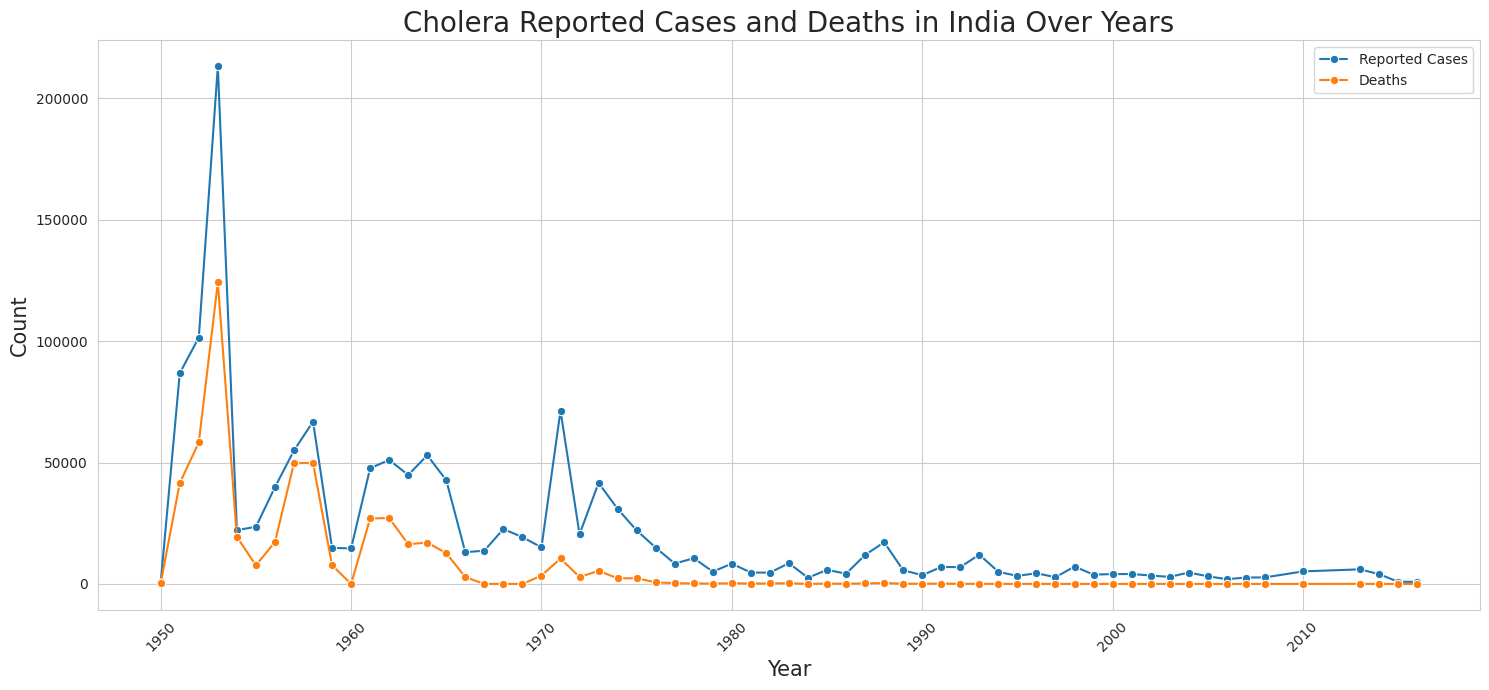

In [ ]:
# Group by year and sum the cases and deaths
india_yearly_data = df_india.groupby('Year').agg(
    cases=('Number of reported cases of cholera', lambda x: pd.to_numeric(x).sum()),
    deaths=('Number of reported deaths from cholera', lambda x: pd.to_numeric(x).sum())
).reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=india_yearly_data, x='Year', y='cases', label='Reported Cases', marker='o')
sns.lineplot(data=india_yearly_data, x='Year', y='deaths', label='Deaths', marker='o')

plt.title('Cholera Reported Cases and Deaths in India Over Years', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('Count', size=15)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: As per all time data, India and Bangladesh have accounted for the maximum number of Deaths due to Cholera. We have also seen that India ranks highest among the overall number of Cases. We will understand the pattern for India in detail below.